In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os

df = pd.read_csv('/Users/anchanghun/Downloads/Winter_AI_Study/dataset/CIC-IDS-2017/MachineLearningCVE/combISCX.csv')

In [4]:
len(df[" Label"].unique())

15

In [5]:
len(df.columns)

79

In [6]:
df.columns.value_counts().sum()

79

In [8]:
null_columns = df.columns[df.isnull().any()].tolist()
print(null_columns)

['Flow Bytes/s']


In [9]:
df["Flow Bytes/s"].isnull().sum()

1358

In [10]:
df["Flow Bytes/s"].value_counts()

Flow Bytes/s
0.000000e+00    355767
4.000000e+06     24991
1.333333e+06     10096
3.000000e+06      9682
8.333333e+04      8884
                 ...  
5.566412e+00         1
3.029639e+03         1
3.365759e+05         1
1.498628e+03         1
6.747159e+03         1
Name: count, Length: 1593908, dtype: int64

In [11]:
df["Flow Bytes/s"] = df["Flow Bytes/s"].fillna(df["Flow Bytes/s"].mean())

In [12]:
df["Flow Bytes/s"].isnull().sum()

0

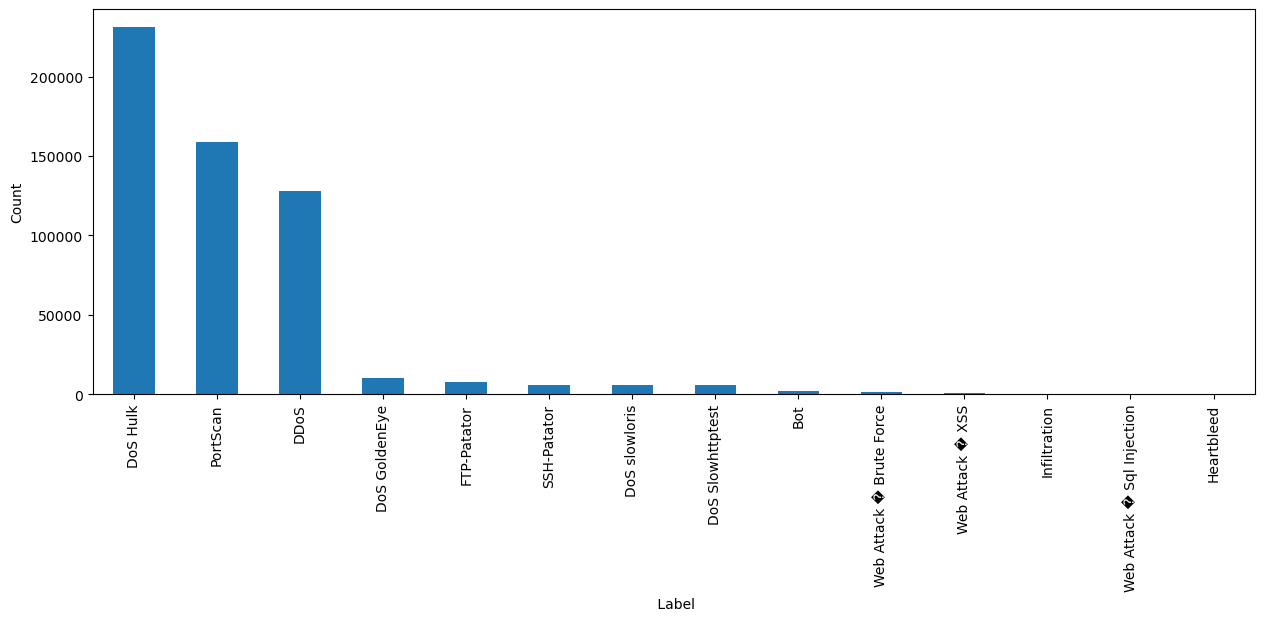

In [13]:
#BENIGN 값제외
plt.figure(figsize=(15, 5))

plt.xlabel('Label')
plt.ylabel('Count')
plt_df = df[df[' Label'] != 'BENIGN']
plt_df[' Label'].value_counts().plot(kind='bar',)
plt.show()


In [14]:
X=df.drop(' Label',axis=1)
X.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,22,166,1,1,0,0,0,0,0.0,0.0,...,0,32,0.000,0.000,0,0,0.0,0.000,0,0
1,60148,83,1,2,0,0,0,0,0.0,0.0,...,0,32,0.000,0.000,0,0,0.0,0.000,0,0
2,123,99947,1,1,48,48,48,48,48.0,0.0,...,0,40,0.000,0.000,0,0,0.0,0.000,0,0
3,123,37017,1,1,48,48,48,48,48.0,0.0,...,0,32,0.000,0.000,0,0,0.0,0.000,0,0
4,0,111161336,147,0,0,0,0,0,0.0,0.0,...,0,0,1753752.625,2123197.578,4822992,95,9463032.7,2657727.996,13600000,5700287


In [15]:
X.shape

(2830743, 78)

In [16]:
y=df[' Label']
y.head(10)

0    BENIGN
1    BENIGN
2    BENIGN
3    BENIGN
4    BENIGN
5    BENIGN
6    BENIGN
7    BENIGN
8    BENIGN
9    BENIGN
Name:  Label, dtype: object

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.1, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(2547668, 78)
(283075, 78)
(2547668,)
(283075,)


In [19]:
y_train = pd.get_dummies(y_train).values
y_test = pd.get_dummies(y_test).values

print(y_train.shape)
print(y_test.shape)

(2547668, 15)
(283075, 15)


In [21]:
import tensorflow as tf
from tensorflow import keras

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape) 

X_train = tf.constant(X_train, dtype=tf.float32)
X_test = tf.constant(X_test, dtype=tf.float32)
y_train = tf.constant(y_train, dtype=tf.float32)
y_test = tf.constant(y_test, dtype=tf.float32)

(2547668, 78) (2547668, 15)
(283075, 78) (283075, 15)


In [25]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv1D, Input, Dense, Flatten, Dropout
from tensorflow.keras.layers import LSTM



input_shape = 78
input_layer = Input(shape=(input_shape,))

dens = Dense(64, activation="relu")(input_layer)
dens1 = Dense(32, activation="tanh")(dens)
dens2 = Dense(16, activation="tanh")(dens1)
outputs = Dense(15, activation="softmax")(dens2)

learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model = keras.Model(input_layer, outputs)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 78)]              0         
                                                                 
 dense_5 (Dense)             (None, 64)                5056      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 15)                255       
                                                                 
Total params: 7919 (30.93 KB)
Trainable params: 7919 (30.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_split = 0.1)


Epoch 1/10
53603/71654 [=====================>........] - ETA: 5s - loss: nan - accuracy: 0.8023

KeyboardInterrupt: 